In [212]:
# Data->MinMaxScaler -> modal
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics 



In [213]:
df= pd.read_excel('mysales.xlsx',index_col=0)
df

,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
Row ID,,,,,,,,,,,,,,,,,,,,,
20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,Storage & Organization,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-116.7600,18,207.31,87536
19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,Telephones and Communication,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-160.9520,22,143.12,87536
26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,Central,Illinois,Des Plaines,60016,2015-03-29,2015-03-31,-41.8700,5,59.98,87534


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1952 entries, 20847 to 25914
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order Priority        1952 non-null   object        
 1   Discount              1952 non-null   float64       
 2   Unit Price            1952 non-null   float64       
 3   Shipping Cost         1952 non-null   float64       
 4   Customer ID           1952 non-null   int64         
 5   Customer Name         1952 non-null   object        
 6   Ship Mode             1952 non-null   object        
 7   Customer Segment      1952 non-null   object        
 8   Product Category      1952 non-null   object        
 9   Product Sub-Category  1952 non-null   object        
 10  Product Container     1952 non-null   object        
 11  Product Name          1952 non-null   object        
 12  Product Base Margin   1936 non-null   float64       
 13  Country           

In [215]:
print(df.shape)

(1952, 24)


In [216]:
df.rename(columns={'Order Priority':'Priority','Ship Mode':'Mode','Unit Price':'Price','Shipping Cost':'ShipCost','Quantity ordered new':'Quantity'},inplace=True)


In [217]:
df

,Priority,Discount,Price,ShipCost,Customer ID,Customer Name,Mode,Customer Segment,Product Category,Product Sub-Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity,Sales,Order ID
Row ID,,,,,,,,,,,,,,,,,,,,,
20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,Storage & Organization,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-116.7600,18,207.31,87536
19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,Telephones and Communication,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-160.9520,22,143.12,87536
26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,Central,Illinois,Des Plaines,60016,2015-03-29,2015-03-31,-41.8700,5,59.98,87534


In [218]:
from sklearn.preprocessing import LabelBinarizer

y = LabelBinarizer().fit_transform(df.Region) # giúp tạo ra matrix vector
y[3]
# D

array([1, 0, 0, 0])

In [219]:
Price = 18.98
ShipCost = 8.51
Quantity = 2.0
Sales = 50.17


c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


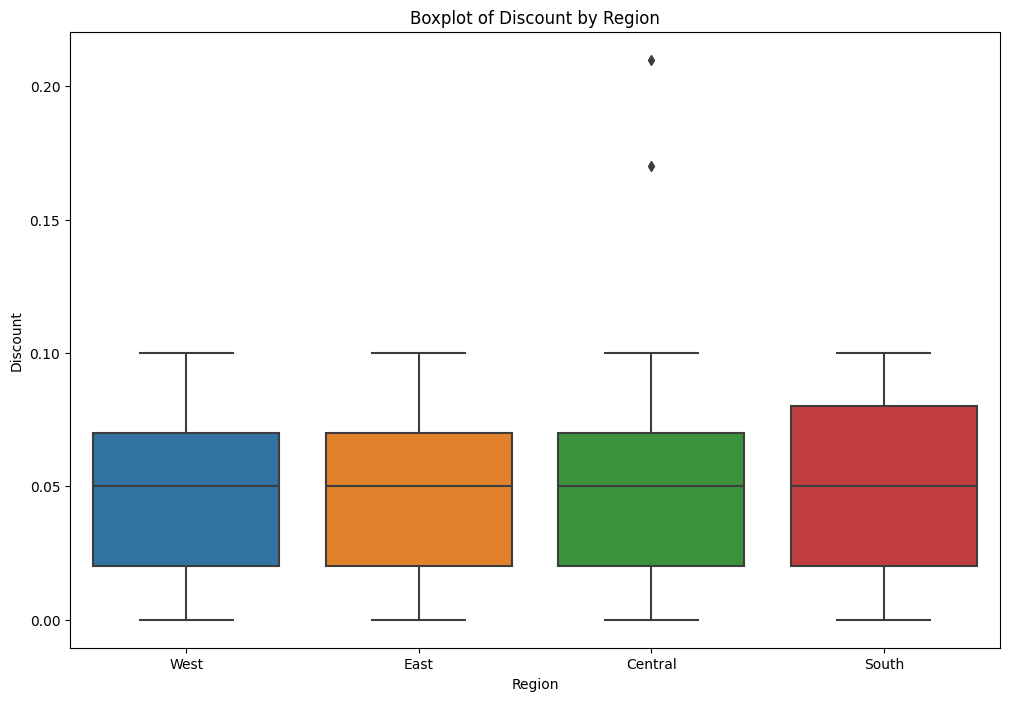

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử 'data' là DataFrame của bạn
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Discount', data=df)
plt.title('Boxplot of Discount by Region')
plt.show()

In [221]:
df.isnull().any()

Priority                False
Discount                False
Price                   False
ShipCost                False
Customer ID             False
Customer Name           False
Mode                    False
Customer Segment        False
Product Category        False
Product Sub-Category    False
Product Container       False
Product Name            False
Product Base Margin      True
Country                 False
Region                  False
State or Province       False
City                    False
Postal Code             False
Order Date              False
Ship Date               False
Profit                  False
Quantity                False
Sales                   False
Order ID                False
dtype: bool

In [222]:
X = df.iloc[:,[2,3,21,22]] # Age, EstimatedSalary and Male
X.head()
X.describe()

,Price,ShipCost,Quantity,Sales
count,1952.000000,1952.000000,1952.000000,1952.000000
mean,109.079221,12.968151,12.944672,985.828832
std,393.481301,17.414631,13.871565,2559.900167
min,1.140000,0.490000,1.000000,2.250000
25%,6.480000,3.230000,5.000000,58.807500
50%,20.990000,6.150000,10.000000,202.395000
75%,100.972500,14.362500,16.000000,802.945000
max,6783.020000,164.730000,167.000000,45737.330000


In [223]:
from scipy.stats import kurtosis

kurt = kurtosis(X)
print(f'Giá trị kurtosis: {kurt}')

Giá trị kurtosis: [181.92818771  10.05312713  22.81775634 112.53647414]


In [224]:
y = df.iloc[:, 1] # Purchased
y.head()

Row ID
20847    0.01
20228    0.02
21776    0.06
24844    0.09
24846    0.08
Name: Discount, dtype: float64

In [225]:
from scipy.stats import kurtosis

kurt = kurtosis(y)
print(f'Giá trị kurtosis: {kurt}')

Giá trị kurtosis: -0.7902348012491003


In [226]:
print(X.iloc[49])

Price        175.99
ShipCost       8.99
Quantity      23.00
Sales       3363.53
Name: 19611, dtype: float64


In [227]:

min_std_variable = np.argmin(39)

# In biến có độ lệch thấp nhất
min_std_variable

0

In [228]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size= 0.2,random_state=16)


In [229]:
from sklearn.preprocessing import MinMaxScaler
# Scale cho input
sc= MinMaxScaler()
x_train = sc.fit_transform(x_train)

In [230]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [231]:
# Hệ số tự do
print(regressor.intercept_)
# Hệ số gốc
print(regressor.coef_)

0.04789739746517811
[ 0.00750702  0.01753268  0.00743658 -0.03785872]


In [232]:
x_train[0]

array([5.55893056e-04, 6.08865075e-05, 6.62650602e-02, 1.30359453e-03])

In [233]:
# x_train_SQRT = np.sqrt(x_train)
# x_train_SQRT[0]


array([0.02357738, 0.00780298, 0.25742001, 0.03610533])

In [234]:
import numpy as np
from sklearn import metrics

y_train_pred=regressor.predict(x_train)

print('Score or R-Squared', regressor.score(x_train,y_train))

print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_train,y_train_pred))

print('Mean squared Error:',
      metrics.mean_squared_error(y_train,y_train_pred))

print('root mean squared Error:',
      np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))

print('Mean Absolute percentage Error:',
      metrics.mean_absolute_percentage_error(y_train,y_train_pred))

Score or R-Squared 0.004489007974805115
Mean Absolute Error: 0.026900312490242547
Mean squared Error: 0.0009832320641217063
root mean squared Error: 0.031356531442774505
Mean Absolute percentage Error: 18508117112468.418


In [235]:
# x test  y test 
y_test_pred=regressor.predict(x_test)

print('Score or R-Squared', regressor.score(x_test,y_test))

print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test,y_test_pred))

print('Mean squared Error:',
      metrics.mean_squared_error(y_test,y_test_pred))

print('root mean squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

print('Mean Absolute percentage Error:',
      metrics.mean_absolute_percentage_error(y_test,y_test_pred))

Score or R-Squared -13618367.38741026
Mean Absolute Error: 41.82256358542127
Mean squared Error: 13505.11432989001
root mean squared Error: 116.21150687384623
Mean Absolute percentage Error: 2.400885513851716e+16


c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


AttributeError: 'Series' object has no attribute 'flatten'

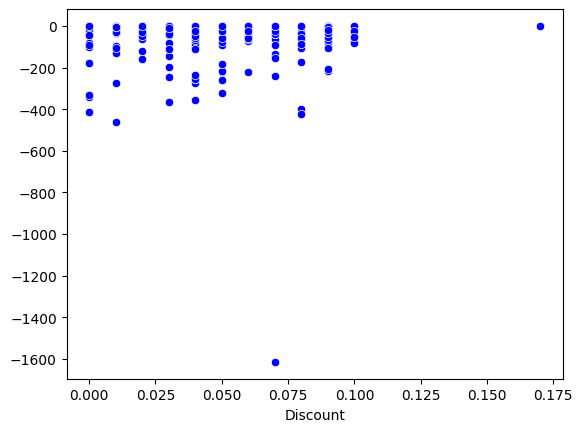

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=y_test,y=y_test_pred.flatten(),
                markers='o',color='b')
# scatterplot biểu đồ dự báo 
sns.lineplot(x=y_test,y=y_test.flatten(),
                markers='s',color='r')
plt.show()

In [ ]:
# poly = PolynomialFeatures(degree=2)
# x_train_poly = poly.fit_transform(x_train_SQRT)

In [ ]:

regressor = LinearRegression()
regressor.fit(x_train_poly, y_train)

LinearRegression()

In [ ]:
# Hệ số tự do
print(regressor.intercept_)
# Hệ số gốc
print(regressor.coef_)

0.047929778371052466
[ 0.          0.33319112 -0.03152011  0.0183472  -0.94514713  0.35913334
 -0.08839169  3.53402987 -1.01176626  0.04007597  0.0439207   0.13965997
  0.04337811 -0.13415413  0.47146275]


c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Discount')

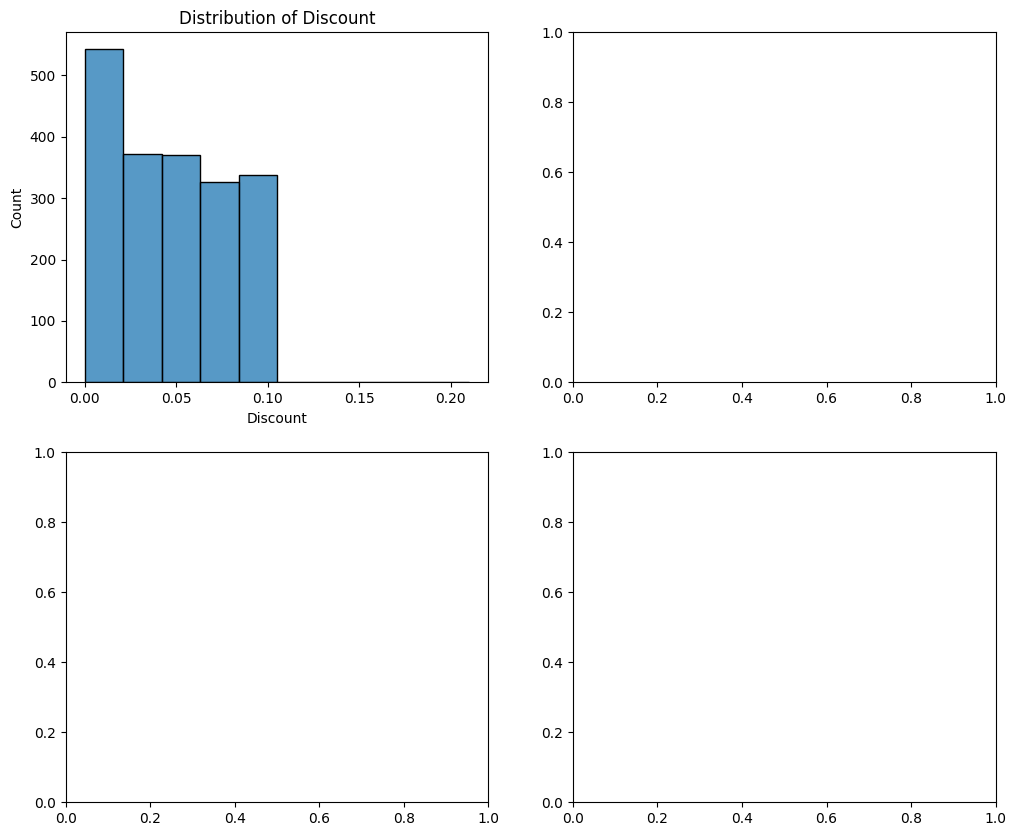

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
sns.histplot(df['Discount'], bins=10, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Discount')


In [ ]:
x_train.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [237]:
Price = 18.98
ShipCost = 8.51
Quantity = 2.0
Sales = 50.17

scaled = sc.transform([[Price,ShipCost,Quantity,Sales]])

print(f"Giá trị T1 đến T6 sau khi sacle: {scaled}")

predicted_logic = regressor.predict(scaled)

print(f"Giá trị dự báo điểm logic: {predicted_logic}")


Giá trị T1 đến T6 sau khi sacle: [[0.00263054 0.04883098 0.0060241  0.00104777]]
Giá trị dự báo điểm logic: [0.04877841]


c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
